In [98]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('D:/PROJECTS/Time Series/orders.csv')
df

,Unnamed: 0,date,total_orders
0,0,2021-08-10,455
1,1,2021-08-11,553
2,2,2021-08-12,569
3,3,2021-08-13,426
4,4,2021-08-14,536
...,...,...,...
85,85,2021-11-04,386
86,86,2021-11-05,375
87,87,2021-11-06,441
88,88,2021-11-07,421


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    90 non-null     int64 
 1   date          90 non-null     object
 2   total_orders  90 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [101]:
df['date'] = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    90 non-null     int64         
 1   date          90 non-null     datetime64[ns]
 2   total_orders  90 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.2 KB


In [102]:
df.set_index('date', inplace=True)
df

,Unnamed: 0,total_orders
date,,
2021-08-10,0,455
2021-08-11,1,553
2021-08-12,2,569
2021-08-13,3,426
2021-08-14,4,536
...,...,...
2021-11-04,85,386
2021-11-05,86,375
2021-11-06,87,441


<AxesSubplot:xlabel='date'>

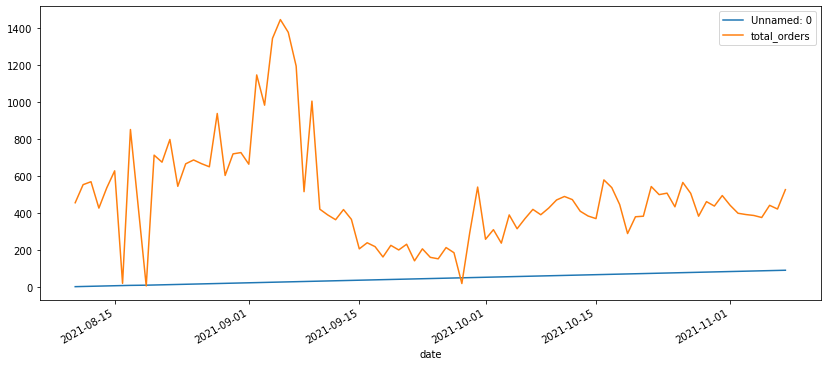

In [103]:
df.plot()

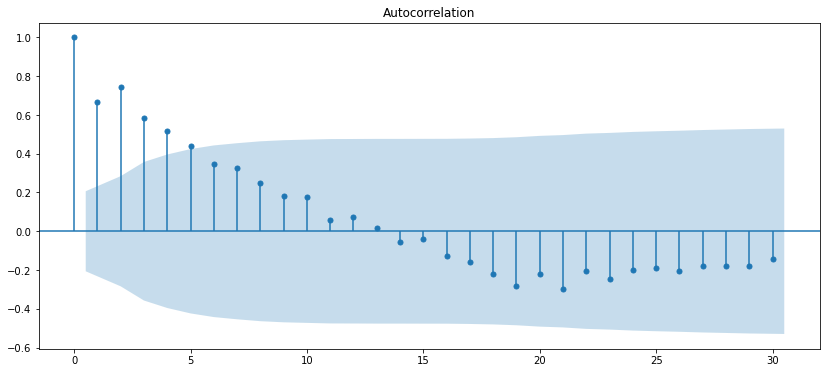

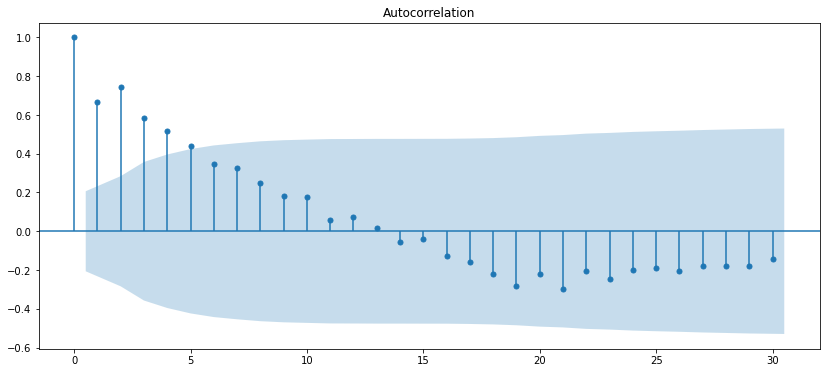

In [104]:
plot_acf(df.total_orders, lags=30)

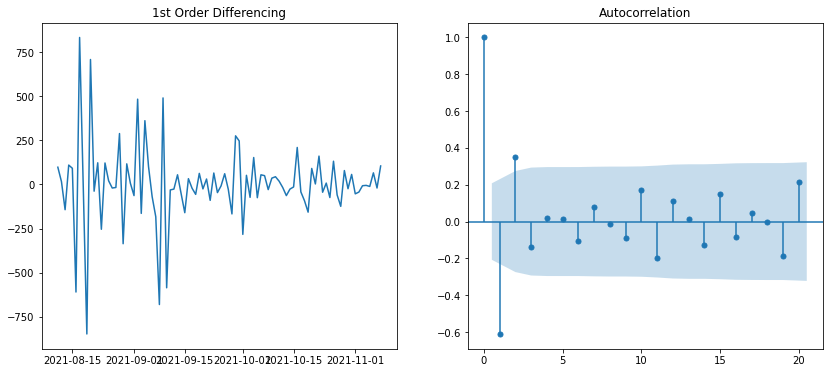

In [105]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_acf(df.total_orders.diff().dropna(), ax=ax2)
plt.show()

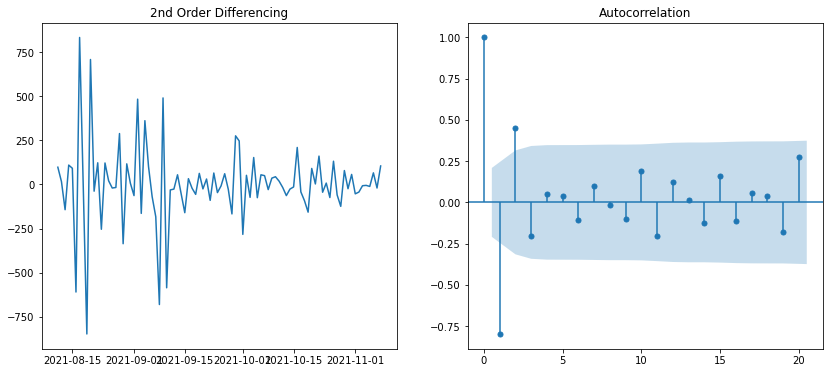

In [106]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_acf(df.total_orders.diff().diff().dropna(), ax=ax2)
plt.show()

In [107]:
# adfuller test
def test_stationarity(data):
    result = adfuller(data.dropna())
    print('p_value: ', result[1])
    
test_stationarity(df.total_orders)
test_stationarity(df.total_orders.diff())
test_stationarity(df.total_orders.diff().diff())

p_value:  0.25760121445028594
p_value:  0.0
p_value:  9.238340684201137e-05


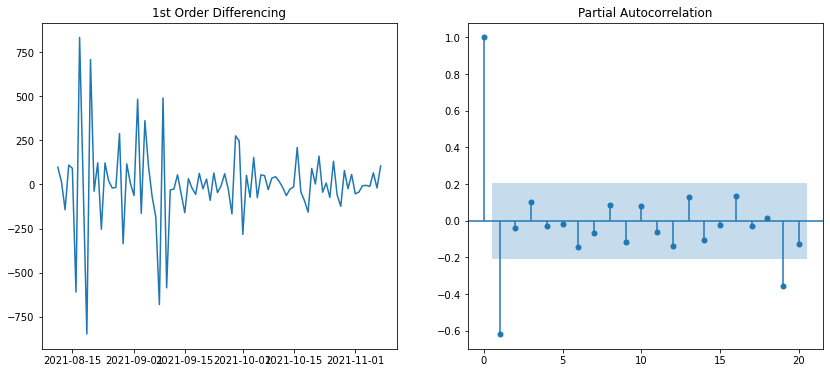

In [108]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.total_orders.diff().dropna(), ax=ax2)
plt.show()

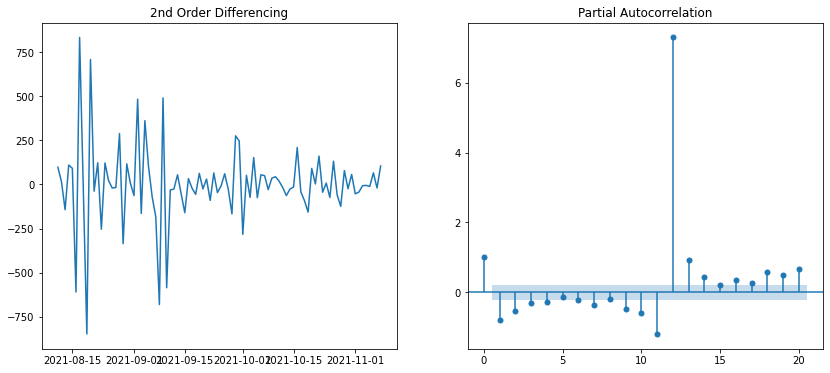

In [109]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.total_orders.diff().diff().dropna(), ax=ax2)
plt.show()

In [110]:
# p = 1-2, d = 1-2, q = 1-2
# fitting
model = pm.auto_arima(df.total_orders, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=1, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1186.793, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1224.165, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1184.900, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1195.559, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1222.166, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1186.762, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1188.266, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1182.899, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1184.761, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1184.793, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1193.559, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1186.266, Time=0.24 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.423 seconds
                               SARIMAX Results                                
Dep. Vari

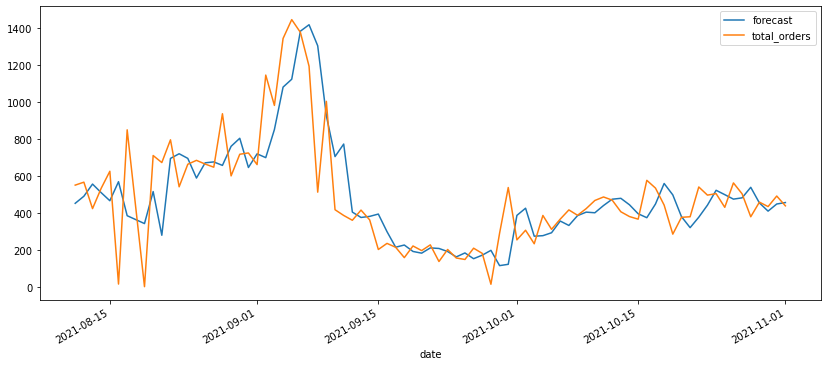

In [111]:
model_arima = ARIMA(df.total_orders[:83], order=(1,1,0))
model = model_arima.fit()

model.plot_predict(dynamic=False)
plt.show()

In [112]:
y_pred = pd.Series(model.forecast(7)[0], index=df.total_orders[83:].index)
y_true = df.total_orders[83:]

print(np.array(y_pred).astype(np.uint8))
print(np.array(y_true))

[216 196 208 200 204 201 202]
[398 391 386 375 441 421 526]


In [113]:
n = np.array(df[:83]).shape[0]
d = np.abs(np.diff(np.array(df[:83].total_orders))).sum() / (n-1)
mase = (np.abs(y_true - y_pred).mean()) / d
mase

0.411984368350348

In [114]:
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # MAPE
mape

0.14639417616266187